In [22]:
import numpy as np
import xml.etree.ElementTree as ET
import json
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

In [23]:
def read_content(xml_file: str):

    tree = ET.parse(xml_file)
    root = tree.getroot()

    box_list = []
    type_list = []

    for obj in root.iter('object'):

        ymin, xmin, ymax, xmax = None, None, None, None

        ymin = int(obj.find("bndbox/ymin").text)
        xmin = int(obj.find("bndbox/xmin").text)
        ymax = int(obj.find("bndbox/ymax").text)
        xmax = int(obj.find("bndbox/xmax").text)

        name = obj.find("name").text
        type = 0
        if name == 'without_mask':
            type = 0
        if name == 'with_mask':
            type = 1
        if name == 'mask_weared_incorrect':
            type = 2
        
        type_list.append(type)
        box_list.append([xmin, ymin, xmax, ymax])

    return type_list, box_list

In [24]:
allTypes = []
allBoxes = []
for i in range(0,853):
    types, boxes = read_content("facemask_data/annotations/maksssksksss{}.xml".format(i))
    allTypes.append(types)
    allBoxes.append(boxes)


In [25]:
imgs = []
for i in range(0,853):
    img = mpimg.imread("facemask_data/images/maksssksksss{}.png".format(i))
    imgs.append(img[:,:,:3])

In [27]:
for i,img in enumerate(imgs):
    minD = min(img.shape[0],img.shape[1])
    dsize = (img.shape[1]*299//minD,img.shape[0]*299//minD) #cv2 perceives second element as y, plt opposite
    allBoxes[i]= [[j*299//minD for j in box] for box in allBoxes[i]]
    imgs[i] = cv2.resize(img,dsize)


(366, 512, 3)
[[79, 105, 109, 142], [185, 100, 226, 144], [325, 90, 360, 141]]


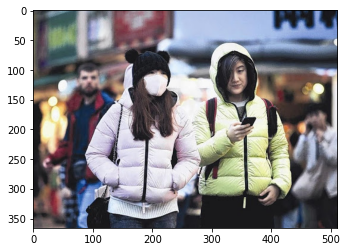

In [26]:
print(imgs[0].shape)
plt.imshow(imgs[0])
print(allBoxes[0])


In [19]:
allSizes = [[imgs[i].shape[0],imgs[i].shape[1]] for i in range(853)]

In [20]:
with open('data_sizes_train.txt','w') as of:
    json.dump(allSizes[:650],of)
with open('data_sizes_test.txt','w') as of:
    json.dump(allSizes[650:],of)

In [17]:
np.save('imgs_train.npy',imgs[:650])
np.save('imgs_test.npy',imgs[650:])

In [18]:
with open('data_boxes_train.txt','w') as of:
    json.dump(allBoxes[:650],of)
with open('data_boxes_test.txt','w') as of:
    json.dump(allBoxes[650:],of)

In [35]:
with open('data_types_train.txt','w') as of:
    json.dump(allTypes[:650],of)
with open('data_types_test.txt','w') as of:
    json.dump(allTypes[650:],of)